In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# Reading Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Converting availability column to In construction instead of dates

In [6]:
df['availability'] = np.where(~(df['availability']=='Ready To Move'),'In Construction',df['availability'])

In [7]:
df['availability'].unique()

array(['In Construction', 'Ready To Move'], dtype=object)

# Converting Sq. meter value to square fit using Lambda function because some values contain sq meter 

In [8]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: 10.7639*float(x.replace("Sq. Meter",'')) if ("Sq. Meter" in x) else x )

In [9]:
df.shape

(13320, 9)

In [10]:
df['total_sqft'] = df['total_sqft'].astype(str)

In [11]:
df[df['total_sqft'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


# Remove Other values

In [12]:
mask = df['total_sqft'].isin(['4125Perch', '1100Sq. Yards', '5.31Acres', '30Acres','1574Sq. Yards','361.33Sq. Yards','117Sq. Yards','500Sq. Yards','315Sq. Yards','3Cents','188.89Sq. Yards','45Sq. Yards','45Sq. Yards','133.3Sq. Yards','122Sq. Yards','300Sq. Yards', '120Sq. Yards', '6Acres', '38Guntha','1.25Acres','2940Sq. Yards','1Grounds','151.11Sq. Yards','1.26Acres','15Acres','2Acres','1500Cents','24Guntha','2.09Acres','132Sq. Yards'])

In [14]:
len(mask=='True')

13320

In [15]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,In Construction,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
df = df[~mask]

In [18]:
df.shape

(13291, 9)

# converting range values to suitable values

In [19]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: 0.5*(float(x.split(' - ')[0])+float(x.split(' - ')[1])) if '-' in x else x) 

In [20]:
df.iloc[30]['total_sqft']

2475.0

In [21]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [22]:
df[df['balcony'].isna()].shape

(605, 9)

In [23]:
df.drop(columns = 'society',inplace=True)

array([[<AxesSubplot:title={'center':'total_sqft'}>]], dtype=object)

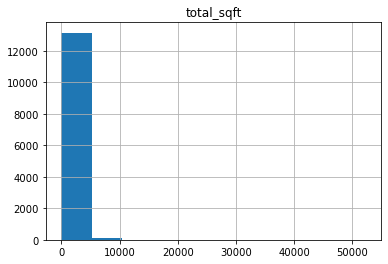

In [24]:
df.hist(column='total_sqft')

In [25]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [26]:
df['size'].value_counts()

2 BHK         5194
3 BHK         4308
4 Bedroom      824
4 BHK          589
3 Bedroom      543
1 BHK          538
2 Bedroom      325
5 Bedroom      295
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           59
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
27 BHK           1
43 Bedroom       1
16 BHK           1
12 Bedroom       1
19 BHK           1
14 BHK           1
18 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [28]:
df[df['size'].isna()].shape

(16, 8)

In [29]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

# Removing null values from column size

In [30]:
df = df[df['size'].notna()]

In [31]:
df.shape

(13275, 8)

In [32]:
df['size'] = df['size'].astype(str)

In [33]:
df.isnull().sum()

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath             57
balcony         589
price             0
dtype: int64

In [34]:
df[df['location'].isna()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,1600.0,3.0,2.0,86.0


In [35]:
df['location'] = np.where(df['location'].isna(),'Anantapura',df['location'])

In [36]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         589
price             0
dtype: int64

# Extracting BHK values from column Size

In [37]:
df['size'] = df['size'].apply(lambda x:int(x.split(' ')[0]))

In [38]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,In Construction,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [39]:
df['size'].value_counts()

2     5519
3     4851
4     1413
1      651
5      354
6      220
7      100
8       88
9       53
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: size, dtype: int64

In [40]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [41]:
df.shape

(13275, 9)

In [42]:
df[df['total_sqft']>5500].shape

(110, 9)

In [43]:
df['location'] = df['location'].astype(str)

In [44]:
df['location'] = df['location'].apply(lambda x : x.strip())

In [45]:
df['location'].value_counts()

Whitefield         538
Sarjapur  Road     397
Electronic City    304
Kanakpura Road     271
Thanisandra        237
                  ... 
adigondanhalli       1
MM Layout            1
Arekempanahalli      1
Richmond Road        1
Mallappa Layout      1
Name: location, Length: 1287, dtype: int64

In [46]:
len(df['location'])

13275

In [47]:
loc = df['location'].value_counts()

In [48]:
loc[loc>10]

Whitefield            538
Sarjapur  Road        397
Electronic City       304
Kanakpura Road        271
Thanisandra           237
                     ... 
HAL 2nd Stage          11
Kodigehalli            11
Banjara Layout         11
Pattandur Agrahara     11
Bommenahalli           11
Name: location, Length: 240, dtype: int64

In [49]:
loc_less = loc[loc<10]

In [50]:
len(loc_less)

1033

In [51]:
df['location'] = df['location'].apply(lambda x:'other' if x in loc_less else x)

In [52]:
df['location'].value_counts()

other                    2740
Whitefield                538
Sarjapur  Road            397
Electronic City           304
Kanakpura Road            271
                         ... 
1st Block Koramangala      10
Kalkere                    10
Sector 1 HSR Layout        10
Dairy Circle               10
Naganathapura              10
Name: location, Length: 255, dtype: int64

In [53]:
df.head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,In Construction,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
6,Super built-up Area,In Construction,Old Airport Road,4,2732.0,4.0,NaN,204.00,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300.0,4.0,NaN,600.00,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3,1310.0,3.0,1.0,63.25,4828.244275
9,Plot Area,Ready To Move,other,6,1020.0,6.0,NaN,370.00,36274.509804


In [54]:
df = df[~(df['total_sqft']/df['size']<300)]

In [55]:
df.shape

(12530, 9)

In [56]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6304.721854
std        4160.092531
min         267.829813
25%        4210.526316
50%        5294.292025
75%        6918.981155
max      176470.588235
Name: price_per_sqft, dtype: float64

array([[<AxesSubplot:title={'center':'price_per_sqft'}>]], dtype=object)

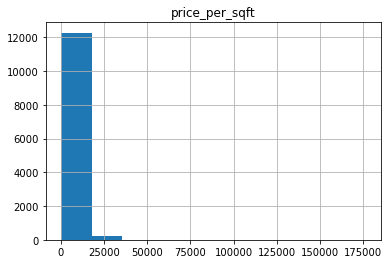

In [57]:
df.hist(column = 'price_per_sqft')

In [58]:
df[df['price_per_sqft']>5000].shape

(6995, 9)

In [60]:
import seaborn as sns

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

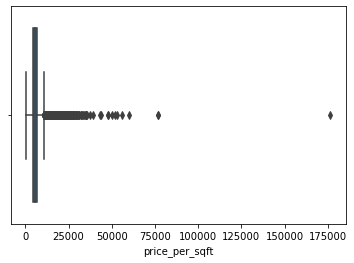

In [61]:
sns.boxplot(df['price_per_sqft'])

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

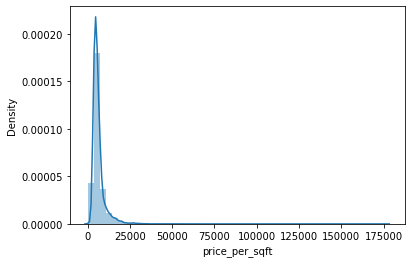

In [62]:
sns.distplot(df[df['price_per_sqft'].notna()]['price_per_sqft'],hist=True)

In [64]:
from math import log
df['price_per_sqft_log'] = df['price_per_sqft'].apply(lambda x: log(x) if isinstance(x, float) else x)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft_log', ylabel='Density'>

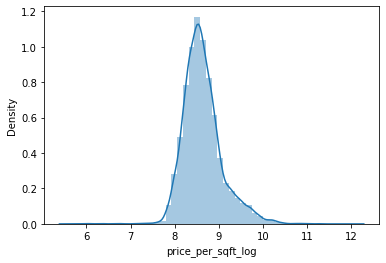

In [65]:
sns.distplot(df[df['price_per_sqft_log'].notna()]['price_per_sqft_log'],hist=True)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

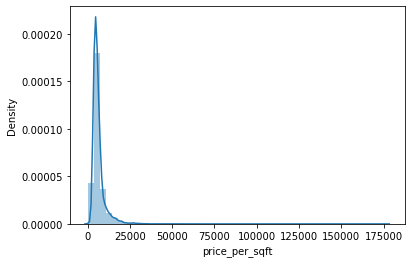

In [66]:
sns.distplot(df[df['price_per_sqft'].notna()]['price_per_sqft'],hist=True)

In [67]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,price_per_sqft_log
0,Super built-up Area,In Construction,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606,8.216037
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615,8.437150
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556,8.367661
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861,8.739679
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000,8.354674


/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

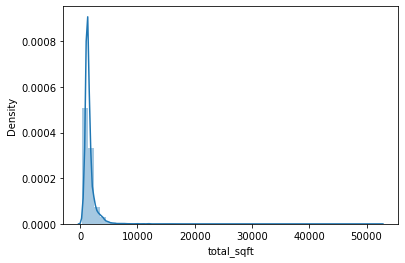

In [68]:
sns.distplot(df[df['total_sqft'].notna()]['total_sqft'],hist=True)

In [69]:
df['total_sqft_log'] = df['total_sqft'].apply(lambda x: log(x) if isinstance(x, float) else x)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft_log', ylabel='Density'>

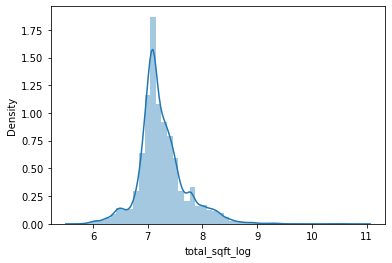

In [70]:
sns.distplot(df[df['total_sqft_log'].notna()]['total_sqft_log'],hist=True)

In [71]:
df['location'].nunique()

255

In [72]:
df[df['location']=='other'].shape

(2439, 11)

In [73]:
lower = df['total_sqft_log'].quantile(0.02)
upper = df['total_sqft_log'].quantile(0.98)

In [74]:
df = df[(df['total_sqft_log']<upper)&(df['total_sqft_log']>lower)]

In [75]:
df.shape

(12004, 11)

In [76]:
lower_ = df['total_sqft'].quantile(0.02)
upper_ = df['total_sqft'].quantile(0.98)

In [77]:
df = df[(df['total_sqft']<upper_)&(df['total_sqft']>lower_)]

In [79]:
df.shape

(11483, 11)

In [80]:
lower_price = df['price_per_sqft'].quantile(0.01)
upper_price = df['price_per_sqft'].quantile(0.99)

In [81]:
df = df[(df['price_per_sqft']<upper_price)&(df['price_per_sqft']>lower_price)]

In [82]:
df.shape

(11240, 11)

In [83]:
lower_price_log = df['price_per_sqft_log'].quantile(0.02)
upper_price_log = df['price_per_sqft_log'].quantile(0.98)

In [84]:
df = df[(df['price_per_sqft_log']<upper_price_log)&(df['price_per_sqft_log']>lower_price_log)]

In [85]:
df.shape

(10786, 11)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

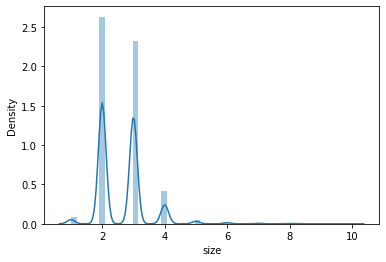

In [86]:
sns.distplot(df[df['size'].notna()]['size'],hist=True)

In [87]:
df['size'].value_counts()

2     5105
3     4517
4      803
1      176
5      103
6       44
7       20
8       14
10       2
9        2
Name: size, dtype: int64

In [88]:
df = df[df['size']<=6]

In [89]:
df.shape

(10748, 11)

In [90]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,price_per_sqft_log,total_sqft_log
0,Super built-up Area,In Construction,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606,8.216037,6.962243
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615,8.437150,7.863267
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556,8.367661,7.272398
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861,8.739679,7.327123
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000,8.354674,7.090077


In [91]:
df[df['bath'].isna()].shape

(44, 11)

In [92]:
df.drop(columns = 'balcony',inplace=True)

In [93]:
df.shape

(10748, 10)

In [94]:
df = df[df['bath'].notna()]

In [95]:
df.shape

(10704, 10)

In [96]:
df.isnull().sum()

area_type             0
availability          0
location              0
size                  0
total_sqft            0
bath                  0
price                 0
price_per_sqft        0
price_per_sqft_log    0
total_sqft_log        0
dtype: int64

In [97]:
df['location'].value_counts()

other                   1970
Whitefield               474
Sarjapur  Road           351
Kanakpura Road           225
Thanisandra              218
                        ... 
2nd Stage Nagarbhavi       3
Giri Nagar                 2
BTM 1st Stage              2
Cunningham Road            1
Sadashiva Nagar            1
Name: location, Length: 255, dtype: int64

In [98]:
df['location'] = df['location'].apply(lambda x:'other' if x in loc_less else x)

In [99]:
df.shape

(10704, 10)

In [100]:
loc_update = df['location'].value_counts()

In [101]:
loc_update_less = loc_update[loc_update<10]

In [102]:
df['location'] = df['location'].apply(lambda x:'other' if x in loc_update_less else x)

In [103]:
loc_update_less.shape

(43,)

In [104]:
pd.options.mode.chained_assignment = None

In [105]:
df['location'] = df['location'].apply(lambda x:'other' if x in loc_update_less else x)

In [106]:
df.shape

(10704, 10)

In [107]:
df['location'].value_counts()

other              2242
Whitefield          474
Sarjapur  Road      351
Kanakpura Road      225
Thanisandra         218
                   ... 
Kalkere              10
Mico Layout          10
Konanakunte          10
Cooke Town           10
Judicial Layout      10
Name: location, Length: 212, dtype: int64

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

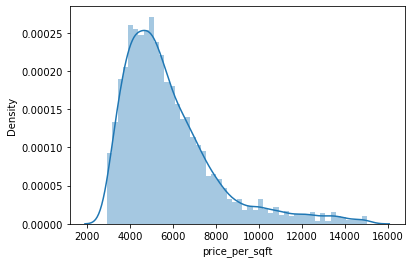

In [108]:
sns.distplot(df[df['price_per_sqft'].notna()]['price_per_sqft'],hist=True)

In [109]:
df['price_per_sqft'].describe()

count    10704.000000
mean      5801.897357
std       2203.807052
min       2918.069585
25%       4271.314198
50%       5252.421226
75%       6666.666667
max      15017.543860
Name: price_per_sqft, dtype: float64

In [114]:
df[df['price_per_sqft']>13000].shape

(184, 10)

In [115]:
df = df[df['price_per_sqft']<=13000]

In [116]:
df.shape

(10520, 10)

In [117]:
df['price_per_sqft'].describe()

count    10520.000000
mean      5659.523976
std       1937.963173
min       2918.069585
25%       4253.263769
50%       5216.680043
75%       6583.333333
max      13000.000000
Name: price_per_sqft, dtype: float64

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

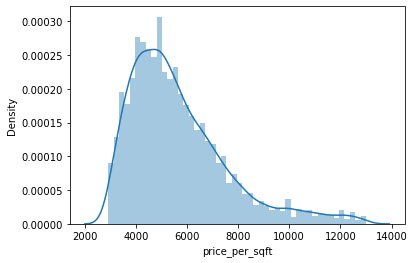

In [118]:
sns.distplot(df[df['price_per_sqft'].notna()]['price_per_sqft'],hist=True)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

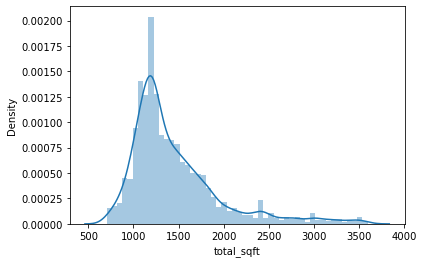

In [119]:
sns.distplot(df[df['total_sqft'].notna()]['total_sqft'],hist=True)

In [120]:
df['total_sqft'].describe()

count    10520.000000
mean      1456.887849
std        509.929810
min        702.000000
25%       1140.000000
50%       1300.000000
75%       1639.000000
max       3596.000000
Name: total_sqft, dtype: float64

In [124]:
df.drop(columns = ['price_per_sqft_log','total_sqft_log'],inplace=True)

In [125]:
df.head()

,area_type,availability,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,In Construction,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [127]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
price             0
price_per_sqft    0
dtype: int64

In [128]:
df[df['bath']>10]

,area_type,availability,location,size,total_sqft,bath,price,price_per_sqft


In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [130]:
df['availability'] = le.fit_transform(df['availability'])

In [131]:
df['area_type'] = le.fit_transform(df['area_type'])

In [132]:
df.head()

,area_type,availability,location,size,total_sqft,bath,price,price_per_sqft
0,3,0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,2,1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,0,1,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,3,1,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,3,1,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [133]:
dummies = pd.get_dummies(df.location)

In [134]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,area_type,availability,location,size,total_sqft,bath,price,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,Uttarahalli,3,1440.0,2.0,62.00,4305.555556,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,Kothanur,2,1200.0,2.0,51.00,4250.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df = df.drop('location',axis='columns')

In [136]:
X = df.drop(['price'],axis = 'columns')

In [149]:
X_1 = df.drop(['price'],axis = 'columns')

In [137]:
Y = df['price']

In [138]:
df.shape

(10520, 218)

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
scaler = MinMaxScaler()

In [143]:
scaler.fit(df[['total_sqft']])

MinMaxScaler()

In [144]:
scaler.fit(df[['price_per_sqft']])

MinMaxScaler()

In [145]:
df.head()

,area_type,availability,size,total_sqft,bath,price,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,0,2,1056.0,2.0,39.07,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,2600.0,5.0,120.00,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,1440.0,2.0,62.00,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,3,1521.0,3.0,95.00,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,2,1200.0,2.0,51.00,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
scaler.fit(X[['total_sqft']])

MinMaxScaler()

In [147]:
scaler.fit(X[['price_per_sqft']])

MinMaxScaler()

In [148]:
X.head()

,area_type,availability,size,total_sqft,bath,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,0,2,1056.0,2.0,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,2600.0,5.0,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,1440.0,2.0,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,3,1521.0,3.0,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,2,1200.0,2.0,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
X[['total_sqft', 'price_per_sqft']] = scaler.fit_transform(X[['total_sqft', 'price_per_sqft']])

In [151]:
X.head()

,area_type,availability,size,total_sqft,bath,price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,0,2,0.122322,2.0,0.077539,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,0.655840,5.0,0.168352,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,0.255010,2.0,0.137621,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,3,0.282999,3.0,0.330078,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,2,0.172080,2.0,0.132111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [153]:
from sklearn import linear_model
regx = linear_model.LinearRegression()

In [155]:
regx.fit(X_train,y_train)

LinearRegression()

In [156]:
regx.score(X_test,y_test)

0.9573368584973588

In [168]:
def predict_price(location,sqft,bath,bhk,area_type,availability):
    loc_index = np.where(X.columns==location)[0][0]
    print(loc_index)
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = area_type
    x[4] = availability
    if loc_index >= 0:
        x[loc_index] = 1

    return regx.predict([x])[0]

In [169]:
predict_price('1st Phase JP Nagar',1000, 2, 2,3,1)

6


1185.7867019059229